<a href="https://colab.research.google.com/github/saurabhashok/Crypto-price-prediction/blob/main/crypto_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from fbprophet import Prophet
import plotly.express as px 

In [ ]:
 #Initializing Plotly
 import  plotly.io as pio

In [ ]:
source = "Downloads/bitcoin_data.csv"

In [ ]:
#read_csv function from pandas
df = pd.read_csv(source)

In [ ]:
df.head()

,Date,Close
0,1/1/2016,435.66
1,1/2/2016,435.40
2,1/3/2016,431.91
3,1/4/2016,433.85
4,1/5/2016,433.34


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1705 non-null   object 
 1   Close   1705 non-null   float64
dtypes: float64(1), object(1)
memory usage: 26.8+ KB


In [ ]:
df.describe()

,Close
count,1705.000000
mean,5455.314499
std,3962.263892
min,357.530000
25%,1062.150000
50%,6005.050000
75%,8624.280000
max,19650.010000


In [ ]:
# Area graph (Date Vs Price)
px.area(df,x='Date',y='Close')

In [ ]:
# Violin plot
px.violin(df, y="Close")

In [ ]:
prophet_df = df.rename(columns={"Date":"ds", "Close":"y" })

In [ ]:
prophet_df  

,ds,y
0,1/1/2016,435.66
1,1/2/2016,435.40
2,1/3/2016,431.91
3,1/4/2016,433.85
4,1/5/2016,433.34
...,...,...
1700,8/27/2020,11329.10
1701,8/28/2020,11535.00
1702,8/29/2020,11474.30
1703,8/30/2020,11716.00


In [ ]:
m = Prophet()
m.fit(prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,1024.030928,-63.089330,2856.468084,1024.030928,1024.030928,367.408771,367.408771,367.408771,-3.507518,-3.507518,-3.507518,370.916288,370.916288,370.916288,0.0,0.0,0.0,1391.439699
1,2016-01-02,1020.292562,-149.154828,2814.704333,1020.292562,1020.292562,346.875581,346.875581,346.875581,15.230811,15.230811,15.230811,331.644769,331.644769,331.644769,0.0,0.0,0.0,1367.168143
2,2016-01-03,1016.554196,-77.016463,2867.243171,1016.554196,1016.554196,285.749738,285.749738,285.749738,-8.815516,-8.815516,-8.815516,294.565254,294.565254,294.565254,0.0,0.0,0.0,1302.303934
3,2016-01-04,1012.815830,-77.163965,2752.080067,1012.815830,1012.815830,278.664345,278.664345,278.664345,18.789796,18.789796,18.789796,259.874549,259.874549,259.874549,0.0,0.0,0.0,1291.480175
4,2016-01-05,1009.077464,-100.133446,2662.147174,1009.077464,1009.077464,223.224561,223.224561,223.224561,-4.414476,-4.414476,-4.414476,227.639038,227.639038,227.639038,0.0,0.0,0.0,1232.302026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1730,2020-09-26,9075.188181,7540.331467,10482.248784,9025.672679,9111.775277,-89.368894,-89.368894,-89.368894,15.230811,15.230811,15.230811,-104.599705,-104.599705,-104.599705,0.0,0.0,0.0,8985.819287
1731,2020-09-27,9075.741437,7488.691646,10372.094969,9021.111036,9117.241643,-151.230902,-151.230902,-151.230902,-8.815516,-8.815516,-8.815516,-142.415387,-142.415387,-142.415387,0.0,0.0,0.0,8924.510535
1732,2020-09-28,9076.294693,7447.241119,10388.529881,9011.760639,9121.073404,-161.199556,-161.199556,-161.199556,18.789796,18.789796,18.789796,-179.989353,-179.989353,-179.989353,0.0,0.0,0.0,8915.095136
1733,2020-09-29,9076.847948,7451.271662,10315.288467,9007.211543,9128.794012,-221.420979,-221.420979,-221.420979,-4.414476,-4.414476,-4.414476,-217.006503,-217.006503,-217.006503,0.0,0.0,0.0,8855.426969


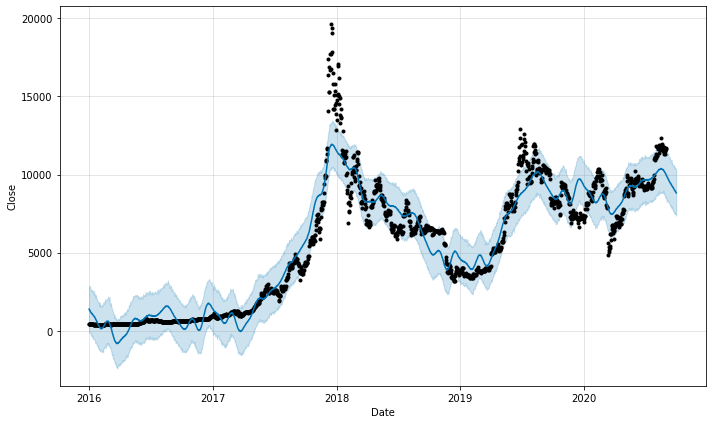

In [ ]:
figure = m.plot(forecast, xlabel='Date', ylabel = 'Close')

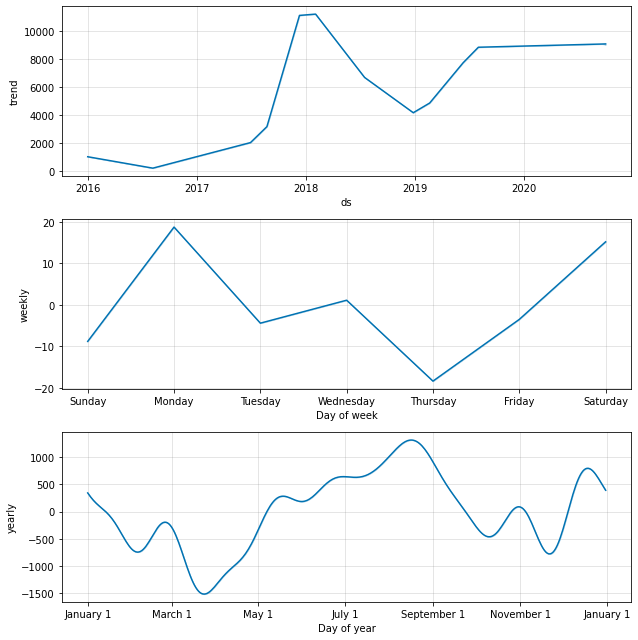

In [ ]:
figure2 = m.plot_components(forecast)

In [ ]:
forecast.to_csv('forecast.csv')
from google.colab import files
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>